In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("/content/Sentiment Analysis.csv")
df.head()

,Date,Rating,Review
0,19-Nov-19,Positive,Very Best camera and chat app
1,19-Nov-19,Positive,I love love love this app its its amazingly ea...
2,19-Nov-19,Negative,Broken joke of an app. Nothing else to it
3,19-Nov-19,Positive,One of the best texting a call apps out there
4,19-Nov-19,Negative,Have to download it again and again so that th...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32875 entries, 0 to 32874
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     32875 non-null  object
 1   Rating   32875 non-null  object
 2   Review   32875 non-null  object
dtypes: object(3)
memory usage: 770.6+ KB


In [4]:
df.describe()

,Date,Rating,Review
count,32875,32875,32875
unique,433,3,32732
top,02-Jun-19,Negative,Love the filters
freq,1003,14835,16


In [5]:
# Convert Rating column to numerical values
rating_mapping = {'Negative': -1, 'Neutral': 0, 'Positive': 1}
df['Sentiment'] = df['Rating'].map(rating_mapping)

print(df)

            Date    Rating                                            Review   \
0      19-Nov-19  Positive                      Very Best camera and chat app   
1      19-Nov-19  Positive  I love love love this app its its amazingly ea...   
2      19-Nov-19  Negative          Broken joke of an app. Nothing else to it   
3      19-Nov-19  Positive      One of the best texting a call apps out there   
4      19-Nov-19  Negative  Have to download it again and again so that th...   
...          ...       ...                                                ...   
32870  12-Sep-18  Negative  After the new update, the snap map when zoomed...   
32871  12-Sep-18  Negative  I have Galaxy S9 and the camera for snapchat w...   
32872  12-Sep-18  Positive  Good app, obviously very popular. Only issue I...   
32873  12-Sep-18  Negative  This app gets worse and worse after each and e...   
32874  12-Sep-18  Positive  Snapchat is great for texting. All my friends ...   

       Sentiment  
0       

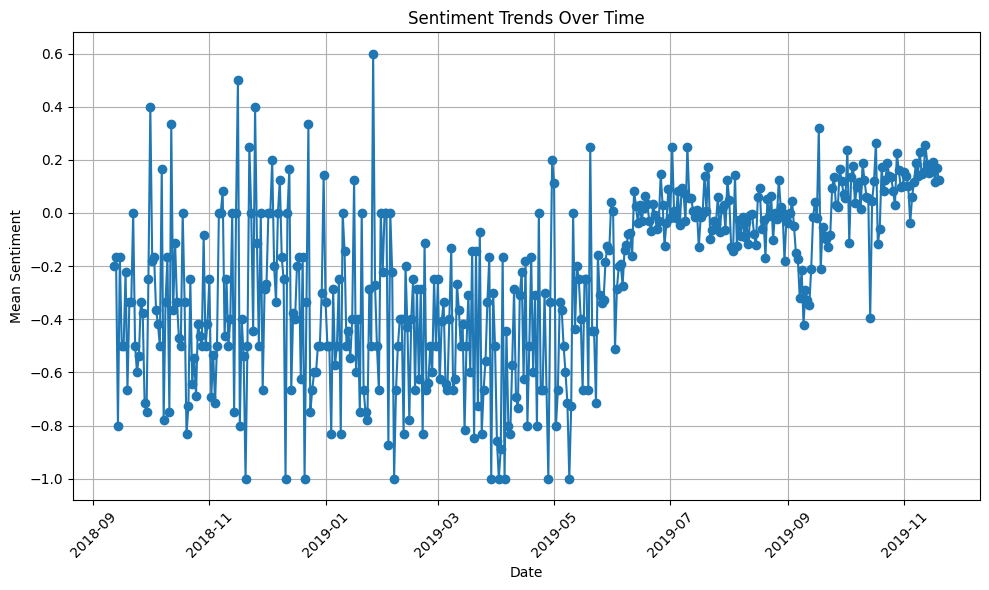

In [6]:
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Group by Date and calculate mean sentiment
sentiment_trends = df.groupby('Date')['Sentiment'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(sentiment_trends['Date'], sentiment_trends['Sentiment'], marker='o')
plt.title('Sentiment Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Mean Sentiment')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [7]:
# Group by date and calculate sentiment counts
date_sentiment_counts = df.groupby(['Date', 'Rating']).size().unstack(fill_value=0)

# Find the most common sentiment for each date
date_most_common_sentiment = date_sentiment_counts.idxmax(axis=1)

# Display the result
print("Most common sentiment for each date:")
print(date_most_common_sentiment)

Most common sentiment for each date:
Date
2018-09-12    Negative
2018-09-13    Negative
2018-09-14    Negative
2018-09-15     Neutral
2018-09-16    Negative
                ...   
2019-11-15    Positive
2019-11-16    Positive
2019-11-17    Positive
2019-11-18    Positive
2019-11-19    Positive
Length: 433, dtype: object


In [8]:
# Calculate overall sentiment counts
overall_sentiment_counts = df['Rating'].value_counts()

# Display the overall sentiment counts
print("\nOverall Sentiment Counts:")
print(overall_sentiment_counts)


Overall Sentiment Counts:
Negative    14835
Positive    13041
Neutral      4999
Name: Rating, dtype: int64


In [9]:
# Count the number of reviews for each date
date_counts = df['Date'].value_counts()

# Display the result
print("Review counts for each date:")
print(date_counts)

Review counts for each date:
2019-06-02    1003
2019-09-09     731
2019-10-14     526
2019-09-07     329
2019-09-10     304
              ... 
2019-04-25       3
2018-12-21       2
2019-01-12       2
2018-11-20       2
2019-04-02       1
Name: Date, Length: 433, dtype: int64


In [10]:
# Group by date and calculate sentiment counts
date_sentiment_counts = df.groupby(['Date', 'Rating']).size().unstack(fill_value=0)

# Merge with the overall review counts for each date
merged_counts = pd.concat([date_counts, date_sentiment_counts], axis=1, sort=False)

# Display the result
print("\nReview and Sentiment counts for each date:")
print(merged_counts)


Review and Sentiment counts for each date:
            Date  Negative  Neutral  Positive
2018-09-12     5         3        0         2
2018-09-13     6         3        1         2
2018-09-14     5         4        1         0
2018-09-15     6         2        3         1
2018-09-16    10         7        1         2
...          ...       ...      ...       ...
2019-11-15   181        67       16        98
2019-11-16   218        73       30       115
2019-11-17   232        85       35       112
2019-11-18   141        46       25        70
2019-11-19    16         7        0         9

[433 rows x 4 columns]


**Sentiment Distribution:**

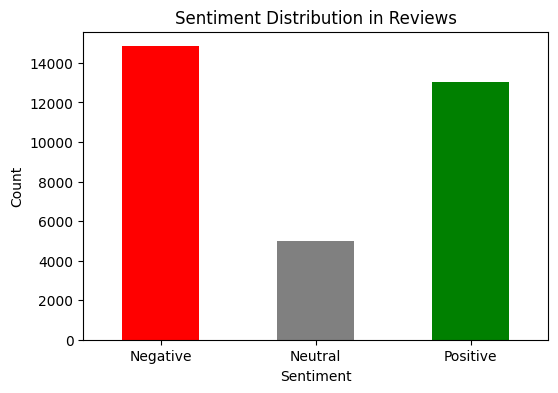

In [18]:
# Define sentiment categories
sentiment_mapping = {'Negative': 'Negative', 'Neutral': 'Neutral', 'Positive': 'Positive'}

# Map sentiment categories
df['Sentiment'] = df['Rating'].map(sentiment_mapping)

# Plotting
plt.figure(figsize=(6, 4))
df['Sentiment'].value_counts().sort_index().plot(kind='bar', color=['red', 'grey', 'green'])
plt.title('Sentiment Distribution in Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

**Keyword Extraction:**

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [29]:
# Combine all reviews into a single document
documents = df['Review'].tolist()
corpus = ' '.join(documents)

In [30]:
# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

In [31]:
# Get feature names (keywords)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Compute TF-IDF scores for each keyword
tfidf_scores = tfidf_matrix.sum(axis=0).A1

In [32]:
# Create a DataFrame to store keywords and their TF-IDF scores
keywords_df = pd.DataFrame({'Keyword': feature_names, 'TF-IDF Score': tfidf_scores})

# Sort keywords by TF-IDF score in descending order
keywords_df = keywords_df.sort_values(by='TF-IDF Score', ascending=False).reset_index(drop=True)

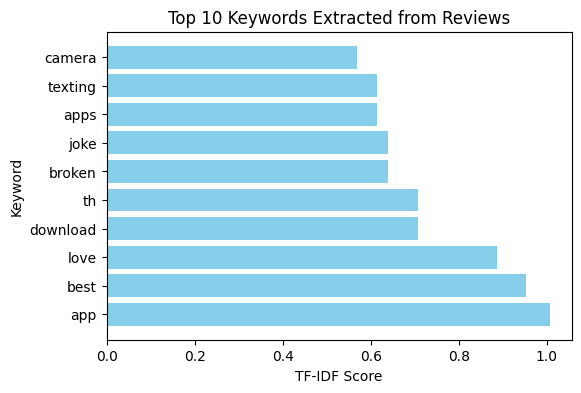

In [34]:
# Plotting
top_n = 10  # Number of top keywords to display
plt.figure(figsize=(6, 4))
plt.barh(keywords_df['Keyword'][:top_n][::-1], keywords_df['TF-IDF Score'][:top_n][::-1], color='skyblue')
plt.xlabel('TF-IDF Score')
plt.ylabel('Keyword')
plt.title('Top {} Keywords Extracted from Reviews'.format(top_n))
plt.gca().invert_yaxis()  # Invert y-axis to display highest score at the top
plt.show()

**Named Entity Recognition (NER):**

In [41]:
import spacy
from collections import Counter

In [42]:
# Load spaCy's English language model
nlp = spacy.load("en_core_web_sm")

# Function to extract named entities from text
def extract_entities(text):
    doc = nlp(text)
    entities = [ent.text for ent in doc.ents if ent.label_ in ['PERSON', 'ORG', 'GPE']]  # Filter for PERSON, ORG, GPE entities
    return entities

In [43]:
# Apply NER to each review
df['Named_Entities'] = df['Review'].apply(extract_entities)

# Flatten the list of named entities
named_entities_flat = [entity for sublist in df['Named_Entities'] for entity in sublist]

# Count the occurrences of each named entity
entity_counts = Counter(named_entities_flat)

In [46]:
# Check if there are any named entities
if entity_counts:
    # Plotting
    top_n = 10  # Number of top entities to display
    top_entities = entity_counts.most_common(top_n)
    entities, counts = zip(*top_entities)

    plt.figure(figsize=(10, 6))
    plt.bar(entities, counts, color='orange')
    plt.xlabel('Named Entity')
    plt.ylabel('Frequency')
    plt.title('Top {} Named Entities Extracted from Reviews'.format(top_n))
    plt.xticks(rotation=45)
    plt.show()
else:
    print("No named entities found in the reviews.")

No named entities found in the reviews.


**Word Cloud:**

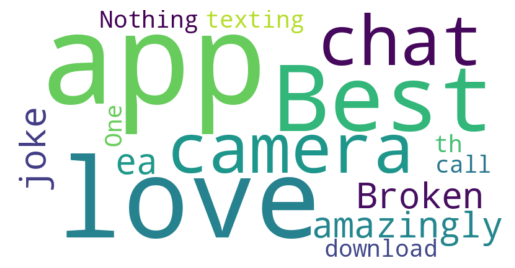

In [38]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white', min_font_size=10)

# Generate the word cloud
wordcloud.generate(df['Review'].str.cat(sep=' '))

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()